# Credit EDA Case Study

### Review Process Followed: 

 1. Data structure review
 
 2.  Missing values review - Dropping, replacing, filling of values.
 
 3. Outlier Management
 
 4.  Dates Management
 
 5.  Target Variable analysis - Imbalance review
 
 6.  Univariate Analysis- Target variable
 
 7.  Correlation

 8.  Univariate Analysis- Numerical variable

 9.  Merging two dataframes
    
 10. Bivariate Analysis

**Application Data**

**Previous Application Data**

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#for removing warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#for view all columns and rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

**Application Data- Written as dataFrame "App_data"**

**Previous Application Data- Written as dataFrame "Pre_data"**

### Checking Structure of Data

In [4]:
App_data=pd.read_csv("application_data.csv")
App_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
Pre_data=pd.read_csv("previous_application.csv")
Pre_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
App_data.shape

(307511, 122)

In [7]:
Pre_data.shape

(1670214, 37)

In [8]:
App_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
Pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [10]:
App_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [11]:
Pre_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


**Data Quality Check, Null value check, Missing Valu check in both dataframes**

In [12]:
App_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [13]:
Pre_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [14]:
#check null values in percent format
#Application Data
(100*App_data.isnull().sum()/len(App_data)).round(2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [15]:
#Previous Application Data
(100*Pre_data.isnull().sum()/len(Pre_data)).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

**Droping the Null Values where missing values are greater than 30%**

In [16]:
App_data= App_data.loc[:, App_data.isnull().mean() <= .3]

In [17]:
#check the data again after dropping
(100*App_data.isnull().sum()/len(App_data)).round(2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

In [18]:
Pre_data=Pre_data.loc[:, Pre_data.isnull().mean() <= .3]

In [19]:
#check the data again after dropping
(100*Pre_data.isnull().sum()/len(Pre_data)).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
dtype: float64

# Imputation of values for columns where missing values are less than 13%

### Imputation in categorical variables

In [20]:
#mode value for name_type_suit
mode=App_data.NAME_TYPE_SUITE.mode()

In [21]:
mode

0    Unaccompanied
dtype: object

In [22]:
#fill the Missing values in Categorical variables NAME_TYPE_SUITE should be replaced with the MODE value 'Unaccompanied'
App_data['NAME_TYPE_SUITE'].fillna(App_data.NAME_TYPE_SUITE.mode(), inplace=True)

In [23]:
# Filling missing values with median in Amt_Annuity
median=App_data['AMT_ANNUITY'].median()
median

24903.0

In [24]:
ee=App_data['AMT_ANNUITY'].fillna(App_data.AMT_ANNUITY.median(), inplace=True)
ee

### Imputation in numerical variables

In [25]:
#AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON
#have more than 90% values as 0 (0 enquiries 1 hour, 1 week and 1 month before application),
#we can impute the missing values in these column as 0 (0 is the median for these columns) 



#Missing values in AMT_GOODS_PRICE could be imputed by mean value for this var since this is a continuous float var
Avg=App_data.AMT_REQ_CREDIT_BUREAU_YEAR.mean()
App_data['AMT_GOODS_PRICE'].fillna(Avg, inplace=True)

In [26]:
#fill Missing values in the these column with 0. 
# According to the application data We are assuming that missisng means that there were no inquiries for the person.
App_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]= App_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK' ,'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].fillna(value=0.0)

# Finding the datatypes of the columns

In [27]:
App_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [28]:
#These variabes unable to be float (number of days,number of enquiries, 
#number of family members and number of people in social circle). SO converting few of them to integer
integer_col=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

App_data[integer_col]=App_data[integer_col].apply(pd.to_numeric)
App_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#Dropping the following variables
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

App_data.drop(labels=unwanted,axis=1,inplace=True)

In [30]:
App_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Checking the Outliers in the Application Dataset

In [31]:
App_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.379095e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.696338e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,1.899974e+00,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.924574e-01,0.370650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.636171e-01,0.669057,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.549997e-01,0.896010,348.000000,34.000000,344.000000,24.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [32]:
Q1 = App_data.quantile(0.25)
Q3 = App_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


SK_ID_CURR                     177997.000000
TARGET                              0.000000
CNT_CHILDREN                        1.000000
AMT_INCOME_TOTAL                90000.000000
AMT_CREDIT                     538650.000000
AMT_ANNUITY                     18072.000000
AMT_GOODS_PRICE                441000.000000
REGION_POPULATION_RELATIVE          0.018657
DAYS_BIRTH                       7269.000000
DAYS_EMPLOYED                    2471.000000
DAYS_REGISTRATION                5469.500000
DAYS_ID_PUBLISH                  2579.000000
HOUR_APPR_PROCESS_START             4.000000
REG_REGION_NOT_LIVE_REGION          0.000000
REG_REGION_NOT_WORK_REGION          0.000000
LIVE_REGION_NOT_WORK_REGION         0.000000
REG_CITY_NOT_LIVE_CITY              0.000000
REG_CITY_NOT_WORK_CITY              0.000000
LIVE_CITY_NOT_WORK_CITY             0.000000
EXT_SOURCE_2                        0.271160
EXT_SOURCE_3                        0.298407
OBS_30_CNT_SOCIAL_CIRCLE            2.000000
DEF_30_CNT

**According to the Application data we detect major 3 outliers.**

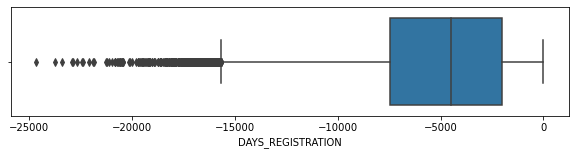

In [33]:
plt.figure(figsize=(10,2))
sns.boxplot(App_data.DAYS_REGISTRATION  )

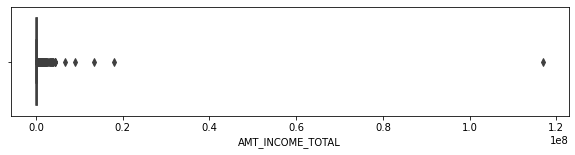

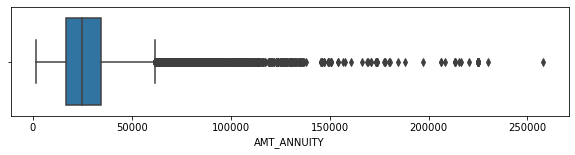

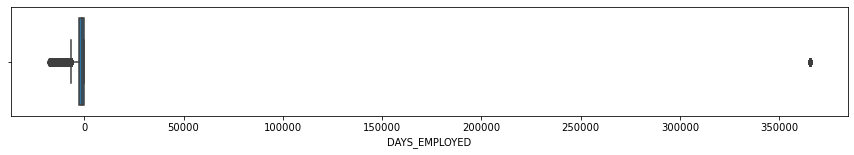

In [34]:
plt.figure(figsize=(10,2))
sns.boxplot(App_data.AMT_INCOME_TOTAL)

plt.figure(figsize=(10,2))
sns.boxplot(App_data.AMT_ANNUITY)

plt.figure(figsize=(15,2))
sns.boxplot(App_data.DAYS_EMPLOYED)
plt.show()

**Columns 
'AMT_INCOME_TOTAL', 
'AMT_ANNUITY' and 
'DAYS_EMPLOYED' are outliers because the minimum and the maximum values of these columns are nowhere near the quartiles.**

## Correcting the above outliers

#Eliminate the values which are outside the 99th percentile(~Q4) in each of the 3 variables

In [35]:

App_data=App_data[App_data.AMT_ANNUITY<np.nanpercentile(App_data['AMT_ANNUITY'], 99)]
App_data=App_data[App_data.DAYS_EMPLOYED<np.nanpercentile(App_data['DAYS_EMPLOYED'], 99)]
App_data=App_data[App_data.AMT_INCOME_TOTAL<np.nanpercentile(App_data['AMT_INCOME_TOTAL'], 99)]

#Rechecking the columns

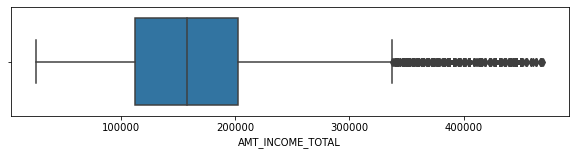

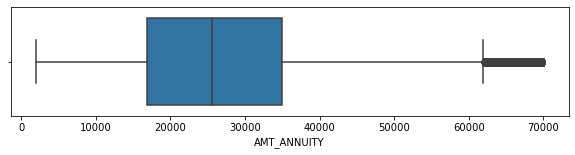

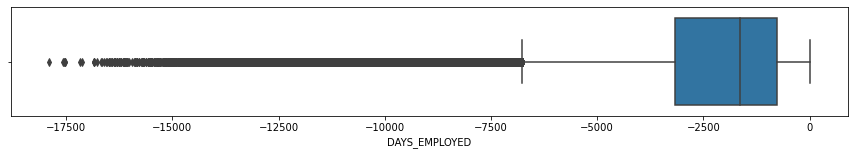

In [36]:

plt.figure(figsize=(10,2))
sns.boxplot(App_data.AMT_INCOME_TOTAL)

plt.figure(figsize=(10,2))
sns.boxplot(App_data.AMT_ANNUITY)

plt.figure(figsize=(15,2))
sns.boxplot(App_data.DAYS_EMPLOYED)
plt.show()

### Some of the columns like 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH' and 'DAYS_EMPLOYED'  have Negative values which cant't be negative. So, we convert into positive with the help of Absolute function. And divide the columns by days of year(365).

In [37]:
App_data['DAYS_BIRTH'] = App_data['DAYS_BIRTH'].abs()
App_data['DAYS_REGISTRATION']=App_data['DAYS_REGISTRATION'].abs()
App_data['DAYS_ID_PUBLISH']=App_data['DAYS_ID_PUBLISH'].abs()
App_data['DAYS_EMPLOYED']=App_data['DAYS_EMPLOYED'].abs()


In [38]:
(App_data['DAYS_BIRTH']/365).round(0).head()

0    26.0
1    46.0
2    52.0
3    52.0
4    55.0
Name: DAYS_BIRTH, dtype: float64

In [39]:
(App_data['DAYS_REGISTRATION']/365).round(0).head()

0    10.0
1     3.0
2    12.0
3    27.0
4    12.0
Name: DAYS_REGISTRATION, dtype: float64

In [40]:
(App_data['DAYS_ID_PUBLISH']/365).round(0).head()

0    6.0
1    1.0
2    7.0
3    7.0
4    9.0
Name: DAYS_ID_PUBLISH, dtype: float64

In [41]:
(App_data['DAYS_EMPLOYED']/365).round(0).head()

0    2.0
1    3.0
2    1.0
3    8.0
4    8.0
Name: DAYS_EMPLOYED, dtype: float64

### TARGET VARIABLE

#  Analysis for the ‘Target variable’ in the dataset ( clients with payment difficulties and all other cases).

In [42]:
#Total number of values(Total number of applicants)
App_data.TARGET.count()

246872

In [43]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)
#for target=1
target1=App_data['TARGET']==1
target1.sum()

21573

In [44]:
#for target=0
target0=App_data['TARGET']==0
target0.sum()

225299

In [45]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

target0.sum()/target1.sum()

10.443563713901636

0    0.912615
1    0.087385
Name: TARGET, dtype: float64


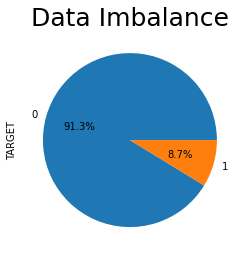

In [46]:
## Pie chart representation of defaulted and non defaulted population. 
print(App_data.TARGET.value_counts(normalize= True))
App_data.TARGET.value_counts(normalize= True).plot.pie(autopct ='%1.1f%%')
plt.title('Data Imbalance',fontsize=25)
plt.show()

The ratio of data imbalance is 10.44, and  8.07% of applicant popluation have defaulted,while  91.9% of applicants are part of non-defaulted universe. 

### Splitting Data with respect to TARGET=0 and TARGET=1, creatting a data frame

In [47]:
Target_final0 =App_data[App_data.TARGET==0]
Target_final1=App_data[App_data.TARGET==1]


In [48]:
Target_final0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [159]:
Target_final1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,6573.0,1827,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,45.0,4409,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,900000.0,Family,Commercial associate,Incomplete higher,Single / not married,With parents,0.030755,10199,2015,4802.0,1038,SUNDAY,13,0,0,0,0,1,1,Industry: type 4,0.432340,0.077499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


###  Categorical Data  Analysis

### We will try analysing if there is any relationship  between variables and target variables

Working                 0.634936
Commercial associate    0.278910
State servant           0.086012
Student                 0.000069
Pensioner               0.000041
Maternity leave         0.000016
Businessman             0.000016
Name: NAME_INCOME_TYPE, dtype: float64


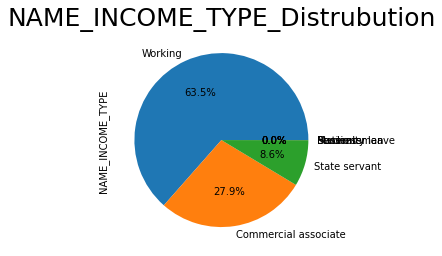

In [51]:
print(App_data.NAME_INCOME_TYPE.value_counts(normalize= True))
App_data.NAME_INCOME_TYPE.value_counts(normalize= True).plot.pie(autopct ='%1.1f%%')
plt.title('NAME_INCOME_TYPE_Distrubution',fontsize=25)
plt.show()


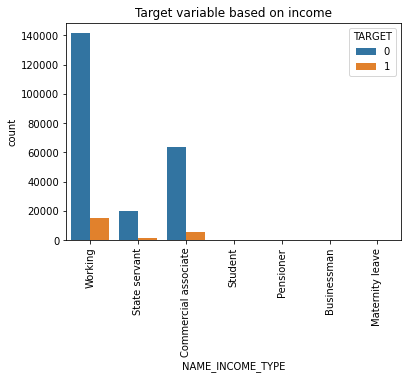

In [111]:
##Now plotting of Target Variable vs Name_Income_Type using countplot
sns.countplot(x= 'NAME_INCOME_TYPE', hue = 'TARGET', data = App_data)
plt.xticks(rotation=90)
plt.title('Target variable based on income')
plt.show()

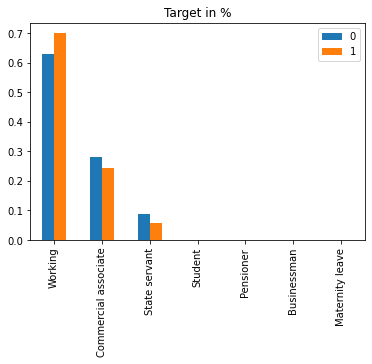

In [113]:
df_income = pd.DataFrame()
df_income['0']= ((Target_final0['NAME_INCOME_TYPE'].value_counts())/len(Target_final0))
df_income['1']= ((Target_final1['NAME_INCOME_TYPE'].value_counts())/len(Target_final1))
ax = df_income.plot.bar(rot=90)
plt.title('Target in %')
plt.show()


### We will now subplot two of these three above graphs. 
### First graph (pie) and third graph(target in %) to do the univariate analysis. We are excluding second graph as it's not resulting in conclusive data representation.

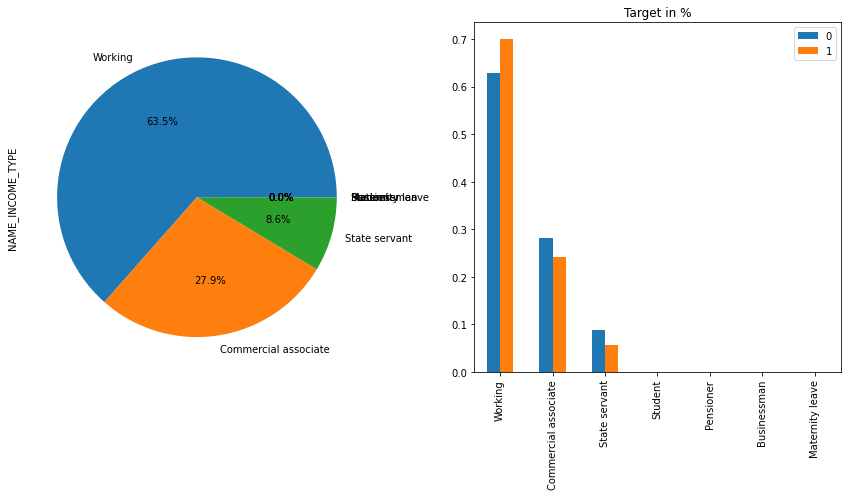

In [143]:
fig, axes = plt.subplots(sharex=False,sharey=False, nrows=1, ncols=2,figsize=(12,7))

App_data.NAME_INCOME_TYPE.value_counts(normalize= True).plot.pie(ax=axes[0],autopct ='%1.1f%%')
plt.title('Income_type distribution')

df_income = pd.DataFrame()
df_income['0']= ((Target_final0['NAME_INCOME_TYPE'].value_counts())/len(Target_final0))
df_income['1']= ((Target_final1['NAME_INCOME_TYPE'].value_counts())/len(Target_final1))
df_income.plot.bar(ax=axes[1],rot=90)
plt.title('Target in %')

fig.tight_layout() 
plt.show()

1.We can see that 'Working' section is the highest loan applicant at 63.5% follwed by 'Commerical associate' and 'State servant'

2.Working class defaulter proportion is higher than the non defaulter. 


3.We will run the same analysis on follwing vairables and its impact on target variable: 
    #1. NAME_CONTRACT_TYPE
    #2. CODE_GENDER
    #3. FLAG_OWN_REALTY
    #4. NAME_TYPE_SUITE
    #5. NAME_EDUCATION_TYPE 
    #6. NAME_HOUSING_TYPE
    #7. NAME_FAMILY_STATUS
    #8. ORGANIZATION_TYPE
    

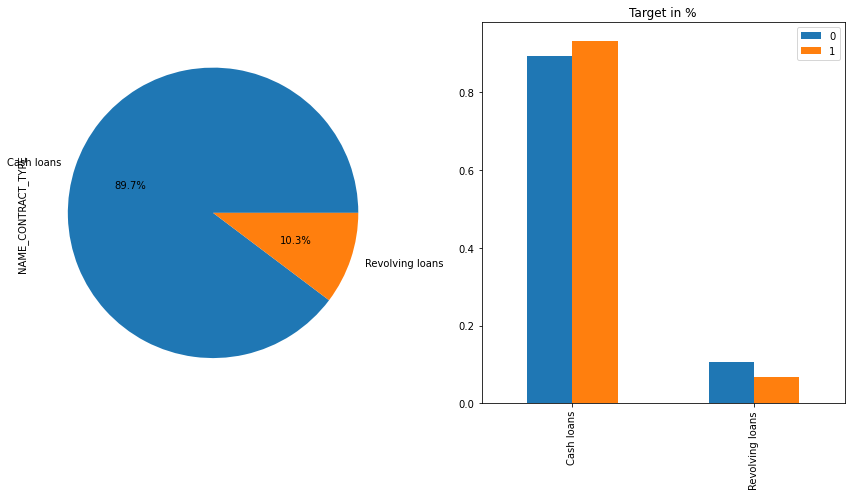

In [136]:
#1. NAME_CONTRACT_TYPE vs Target Variable

fig, axes = plt.subplots(sharex=False,sharey=False, nrows=1, ncols=2,figsize=(12,7))

App_data.NAME_CONTRACT_TYPE.value_counts(normalize= True).plot.pie(ax=axes[0],autopct ='%1.1f%%')
plt.title('CONTRACT_TYPE distribution')

df_contract = pd.DataFrame()
df_contract['0']= ((Target_final0['NAME_CONTRACT_TYPE'].value_counts())/len(Target_final0))
df_contract['1']= ((Target_final1['NAME_CONTRACT_TYPE'].value_counts())/len(Target_final1))
df_contract.plot.bar(ax=axes[1],rot=90)
plt.title('Target in %')

fig.tight_layout() 
plt.show()


1.Loan applicants have requested for cash loans the most with ~90% of disbursed loan being cash loans.

2.Albeit cash loan segment has seen the higher default compared to revolving loans. Hence we can infer that revolving loans have comparatively safer. This may be attributed to the Nature of revolving loan as it is considered a flexible financing tool due to its repayment and re-borrowing flexibility.

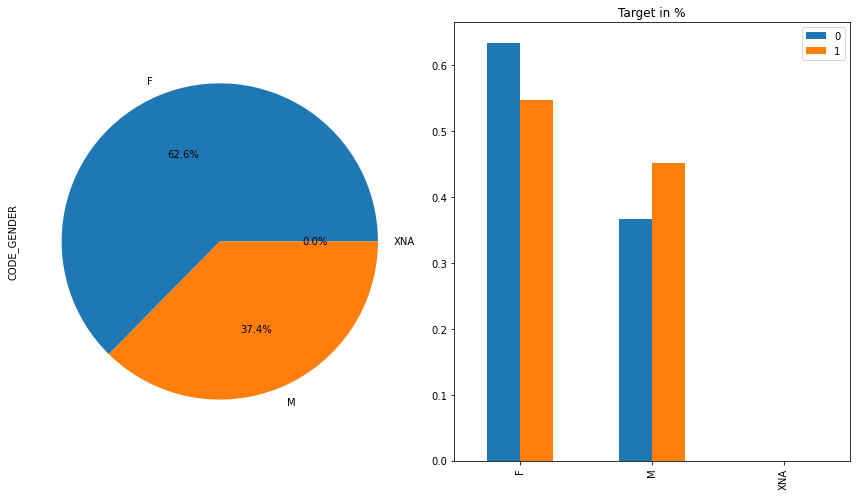

In [138]:
# 2.CODE_GENDER vs Target Variable

fig, axes = plt.subplots(sharex=False,sharey=False, nrows=1, ncols=2,figsize=(12,7))

App_data.CODE_GENDER.value_counts(normalize= True).plot.pie(ax=axes[0],autopct ='%1.1f%%')
plt.title('CODE_GENDER_Distrubution')

df_gender = pd.DataFrame()
df_gender['0']= ((Target_final0['CODE_GENDER'].value_counts())/len(Target_final0))
df_gender['1']= ((Target_final1['CODE_GENDER'].value_counts())/len(Target_final1))
df_gender.plot.bar(ax=axes[1],rot=90)
plt.title('Target in %')

fig.tight_layout() 
plt.show()

1.Female loan applicants(approx 63%) are more than male applicants (~37%). 

2.However, number of male applicants who have defaulted are same as female applicants

3.We can say here that 'Males' are less credit worthy than females. 

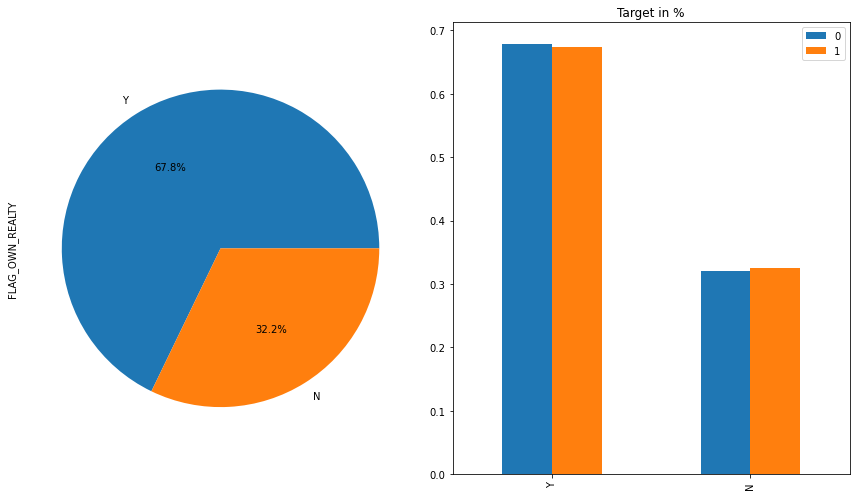

In [139]:
#3. FLAG_OWN_REALTY vs Target Variable
fig, axes = plt.subplots(sharex=False,sharey=False, nrows=1, ncols=2,figsize=(12,7))

App_data.FLAG_OWN_REALTY.value_counts(normalize= True).plot.pie(ax=axes[0],autopct ='%1.1f%%')
plt.title('FLAG_OWN_REALTY_Distrubution')

df_realty= pd.DataFrame()
df_realty['0']= ((Target_final0['FLAG_OWN_REALTY'].value_counts())/len(Target_final0))
df_realty['1']= ((Target_final1['FLAG_OWN_REALTY'].value_counts())/len(Target_final1))
df_realty.plot.bar(ax=axes[1],rot=90)
plt.title('Target in %')

fig.tight_layout() 
plt.show()

1.People who own a flat/house have applied for more loans(~68%) comapred to the people who dont own.  
2. We can't derive any relationship for this variable.  

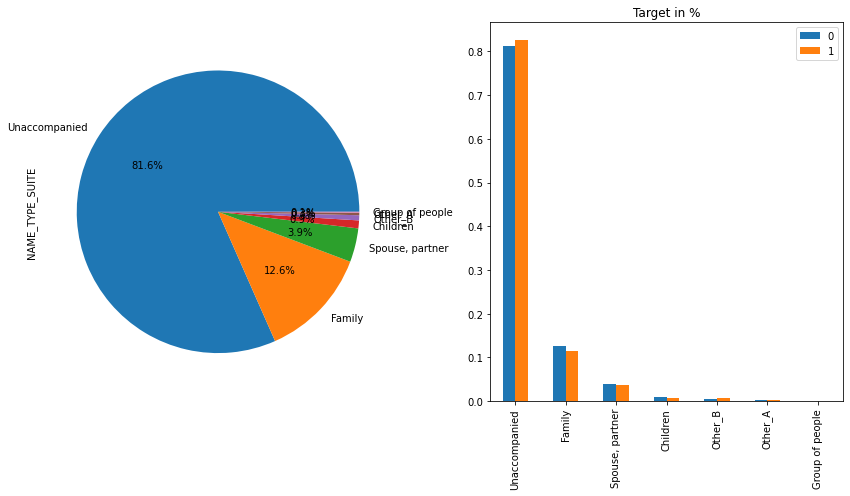

In [140]:
#4. NAME_TYPE_SUITE vs Target Variable
fig, axes = plt.subplots(sharex=False,sharey=False, nrows=1, ncols=2,figsize=(12,7))

App_data.NAME_TYPE_SUITE.value_counts(normalize= True).plot.pie(ax=axes[0],autopct ='%1.1f%%')
plt.title('NAME_TYPE_SUITE_Distrubution')

df_accompanied= pd.DataFrame()
df_accompanied['0']= ((Target_final0['NAME_TYPE_SUITE'].value_counts())/len(Target_final0))
df_accompanied['1']= ((Target_final1['NAME_TYPE_SUITE'].value_counts())/len(Target_final1))
df_accompanied.plot.bar(ax=axes[1],rot=90)
plt.title('Target in %')

fig.tight_layout() 
plt.show()

1.People who  were unaccompanied have applied for more loans(~82%) compared to the people who came with family.  
2.Correspondigly the data for default moves in same direction as the people who were unaccompanied defaulted more than the people who were with family.Hence, NAME_TYPE_SUITE doesnt seems to be an important variable. 

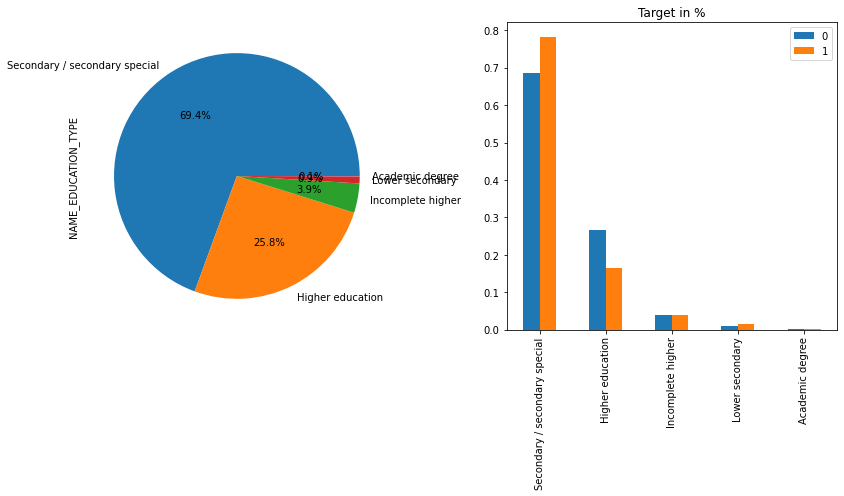

In [141]:
#5. NAME_EDUCATION_TYPE vs Target Variable

fig, axes = plt.subplots(sharex=False,sharey=False, nrows=1, ncols=2,figsize=(12,7))

App_data.NAME_EDUCATION_TYPE.value_counts(normalize= True).plot.pie(ax=axes[0],autopct ='%1.1f%%')
plt.title('NAME_EDUCATION_TYPE_Distrubution')

df_education= pd.DataFrame()
df_education['0']= ((Target_final0['NAME_EDUCATION_TYPE'].value_counts())/len(Target_final0))
df_education['1']= ((Target_final1['NAME_EDUCATION_TYPE'].value_counts())/len(Target_final1))
df_education.plot.bar(ax=axes[1],rot=90)
plt.title('Target in %')

fig.tight_layout() 
plt.show()

1.People who  were had secondary education had applied for most loans(~69%) followed by people with higher education. 
2. However, proporationate defaulters compared to non defaulters in case of people with secondary education. We  can see some relationship between education and default rate i.e poeple with secondary education defualt more than people with higher education

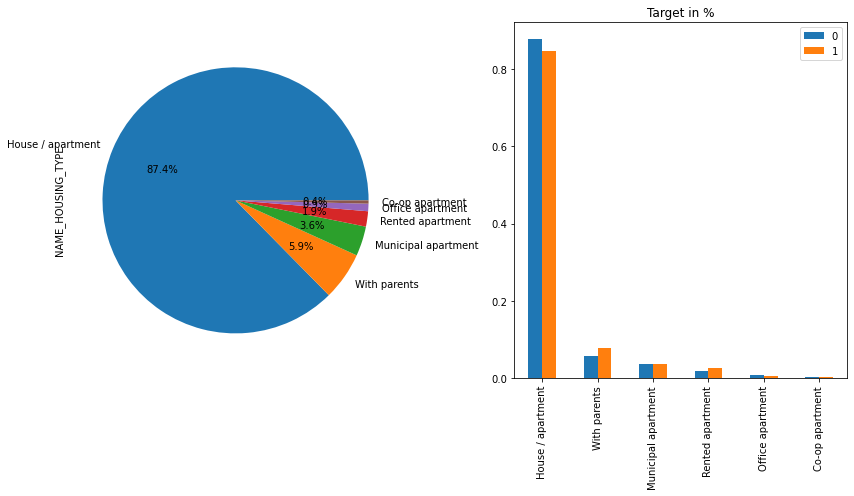

In [145]:
#6. Housing_TYPE vs Target Variable

fig, axes = plt.subplots(sharex=False,sharey=False, nrows=1, ncols=2,figsize=(12,7))

App_data.NAME_HOUSING_TYPE.value_counts(normalize= True).plot.pie(ax=axes[0],autopct ='%1.1f%%')
plt.title('NAME_HOUSING_TYPE_Distrubution')

df_housing= pd.DataFrame()
df_housing['0']= ((Target_final0['NAME_HOUSING_TYPE'].value_counts())/len(Target_final0))
df_housing['1']= ((Target_final1['NAME_HOUSING_TYPE'].value_counts())/len(Target_final1))
df_housing.plot.bar(ax=axes[1],rot=90)
plt.title('Target in %')

fig.tight_layout() 
plt.show()


1. People with parents and who live in rented appartment have reported higher proportion of default  compared to non defaulter. Altohugh 87% of loans have been disbursed to people who have house/apartment hence the disbursement is already following a good underwriting standard.  

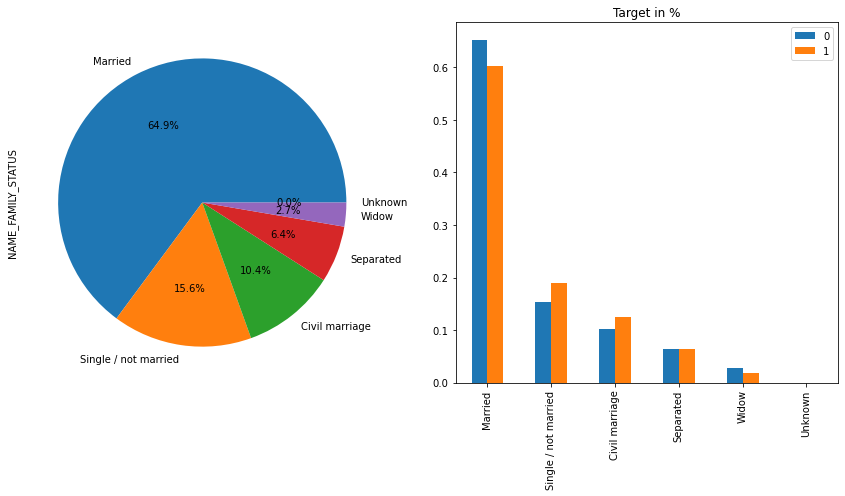

In [146]:

#7. FAMILY_STATUS vs Target Variable

fig, axes = plt.subplots(sharex=False,sharey=False, nrows=1, ncols=2,figsize=(12,7))

App_data.NAME_FAMILY_STATUS.value_counts(normalize= True).plot.pie(ax=axes[0],autopct ='%1.1f%%')
plt.title('NAME_FAMILY_STATUS_TYPE_Distrubution')

df_FAMILY= pd.DataFrame()
df_FAMILY['0']= ((Target_final0['NAME_FAMILY_STATUS'].value_counts())/len(Target_final0))
df_FAMILY['1']= ((Target_final1['NAME_FAMILY_STATUS'].value_counts())/len(Target_final1))
df_FAMILY.plot.bar(ax=axes[1],rot=90)
plt.title('Target in %')

fig.tight_layout() 
plt.show()


'Single/ not married' and 'civil married' proportionally have higher defaulted population compared to non defaulted population. 

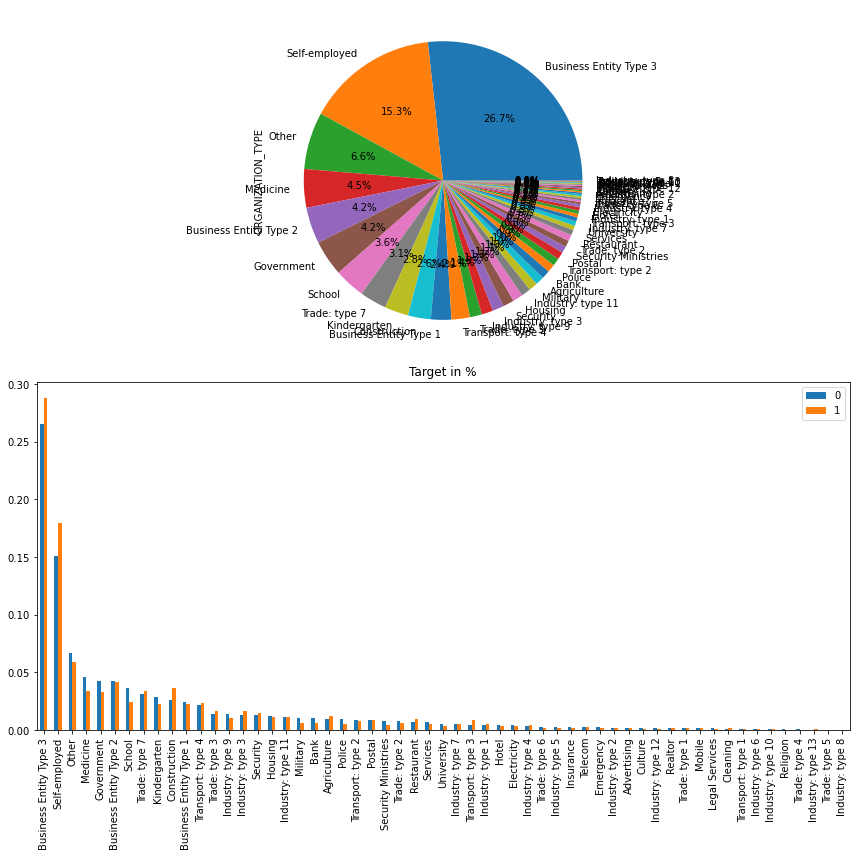

In [156]:
#8. ORGANIZATION_TYPE vs Target Variable

fig, axes = plt.subplots(sharex=False,sharey=False, nrows=2,figsize=(12,12))

App_data.ORGANIZATION_TYPE.value_counts(normalize= True).plot.pie(ax=axes[0],autopct ='%1.1f%%')
plt.title('ORGANIZATION_TYPE_Distrubution')

df_organization = pd.DataFrame()
df_organization['0']= ((Target_final0['ORGANIZATION_TYPE'].value_counts())/len(Target_final0))
df_organization['1']= ((Target_final1['ORGANIZATION_TYPE'].value_counts())/len(Target_final1))
df_organization.plot.bar(ax=axes[1],rot=90)
plt.title('Target in %')

fig.tight_layout() 
plt.show()

We see that 'business type 3' and 'self employed' reported higher defaulter proportion comapred to non defaulter universe. 

### Following variables seems to reveal the below listed information from the data set:
    
1. GENDER: Female loan applicants (approx 63%) are more than male applicants (~37%).However,  proportionate default applicants are more amongst male applicants compared to female applicants. We can say here that 'Males' are less credit worthy than females. 

        
2. Income: We can see that 'Working' type are the highest loan applicant at 63.5% followed by 'Commercial associate' and 'State servant' however working population has higher defaulter proportion compared to non-defaulter population. 'Commercial associate' and 'State servant' are better prospect from lending underwriting purpose. 


3. Type of Loan: Loan applicants have requested for cash loans the most with ~90% of disbursed loan being cash loans. Albeit cashloan segment has a higher default proportion when compared to non-default proportion. Hence we can infer that revolving loans are comparatively safer.This may be attributed to the Nature of revolving loan as it is considered a flexible financing tool due to its repayment and re-borrowing flexibility hence people avoid defaulting on these loans.

        
4. Organization type: 'Business type 3' and 'self-employed' have higher defaulter proportion compared to its non-defaulter universe.   
       
       
5. Family: Single/ Unmarried people have higher defaulter proportion compared to non-defaulter universe. 


6. Education: Applicants with secondary education have higher default proportion compared to non-defaulter. People with higher education are more reliable from lending prospective.

 

### Find correlation for numerical columns for non defaulter population and assessing top 10 correlation

In [62]:
cols_num=list(Target_final0.select_dtypes('int64').columns)
cols_float=list(Target_final0.select_dtypes('float').columns)

cols=cols_num+cols_float

Nondef_num=Target_final0[cols]
Nondef_corr = Nondef_num.corr()
round(Nondef_corr, 3)

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000,NaN,-0.000,0.001,0.000,-0.001,-0.000,0.000,0.001,0.003,-0.004,-0.002,0.000,0.002,-0.000,0.001,0.000,0.000,-0.000,0.002,0.002,0.000,0.002,0.000,0.004,-0.002,-0.002,0.001,0.001,0.000,0.002
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000,NaN,1.000,-0.243,-0.063,0.118,-0.034,-0.023,-0.017,-0.008,-0.002,0.010,0.018,-0.018,-0.019,-0.009,-0.023,-0.031,-0.164,-0.026,-0.015,0.020,0.004,0.020,0.003,-0.001,0.001,-0.000,-0.018,-0.001,-0.021
DAYS_BIRTH,0.001,NaN,-0.243,1.000,0.353,0.110,-0.049,-0.059,-0.039,-0.014,-0.166,-0.112,-0.031,0.053,0.153,0.091,0.147,0.040,0.301,0.142,0.176,-0.019,-0.015,-0.019,-0.015,-0.000,-0.001,0.004,0.034,0.009,0.070
DAYS_EMPLOYED,0.000,NaN,-0.063,0.353,1.000,0.087,-0.022,-0.057,-0.083,-0.064,-0.112,-0.126,-0.075,0.035,0.088,0.051,0.089,-0.009,0.173,0.081,0.121,0.001,-0.007,0.001,-0.009,0.003,-0.001,0.002,0.030,0.002,0.025
DAYS_ID_PUBLISH,-0.001,NaN,0.118,0.110,0.087,1.000,-0.006,-0.027,-0.021,-0.009,-0.054,-0.033,-0.002,0.032,0.035,0.025,0.036,0.004,0.029,0.060,0.102,0.009,-0.008,0.010,-0.010,-0.001,0.002,0.009,0.031,0.014,0.057
HOUR_APPR_PROCESS_START,-0.000,NaN,-0.034,-0.049,-0.022,-0.006,1.000,0.054,0.070,0.056,0.011,-0.001,-0.005,0.063,0.035,0.028,0.045,0.168,0.031,0.151,-0.036,-0.006,-0.005,-0.006,-0.007,-0.013,0.004,-0.002,0.032,0.003,-0.020
REG_REGION_NOT_LIVE_REGION,0.000,NaN,-0.023,-0.059,-0.057,-0.027,0.054,1.000,0.463,0.090,0.340,0.142,0.004,0.076,0.014,0.032,0.016,-0.005,-0.020,0.013,-0.050,-0.020,-0.008,-0.020,-0.008,-0.002,-0.000,0.000,-0.005,-0.003,-0.020
REG_REGION_NOT_WORK_REGION,0.001,NaN,-0.017,-0.039,-0.083,-0.021,0.070,0.463,1.000,0.862,0.148,0.220,0.179,0.157,0.040,0.067,0.041,0.060,-0.016,0.029,-0.043,-0.029,-0.017,-0.029,-0.017,-0.003,-0.003,-0.001,0.001,-0.005,-0.020
LIVE_REGION_NOT_WORK_REGION,0.003,NaN,-0.008,-0.014,-0.064,-0.009,0.056,0.090,0.862,1.000,0.015,0.168,0.221,0.147,0.043,0.065,0.043,0.086,-0.007,0.029,-0.023,-0.023,-0.016,-0.023,-0.016,-0.002,-0.002,-0.001,0.004,-0.005,-0.014


In [63]:
l1=Nondef_corr.unstack()
l1.sort_values(ascending=False).drop_duplicates()

AMT_REQ_CREDIT_BUREAU_YEAR   AMT_REQ_CREDIT_BUREAU_YEAR     1.000000
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998495
AMT_GOODS_PRICE              AMT_CREDIT                     0.985618
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.861724
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.861537
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.820546
AMT_ANNUITY                  AMT_CREDIT                     0.778694
                             AMT_GOODS_PRICE                0.777705
REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_LIVE_REGION     0.462738
REG_CITY_NOT_WORK_CITY       REG_CITY_NOT_LIVE_CITY         0.442920
AMT_ANNUITY                  AMT_INCOME_TOTAL               0.441429
AMT_INCOME_TOTAL             AMT_GOODS_PRICE                0.376331
AMT_CREDIT                   AMT_INCOME_TOTAL               0.372402
DAYS_EMPLOYED                DAYS_BIRTH                     0.352566
REG_CITY_NOT_LIVE_CITY       REG_R

In [162]:
Top 10 correlations for non default population

**OBS_30_CNT_SOCIAL_CIRCLE     &     OBS_60_CNT_SOCIAL_CIRCLE       0.998495

**AMT_GOODS_PRICE              &     AMT_CREDIT                     0.985618

**DEF_30_CNT_SOCIAL_CIRCLE     &     DEF_60_CNT_SOCIAL_CIRCLE       0.861724

**REG_REGION_NOT_WORK_REGION   &     LIVE_REGION_NOT_WORK_REGION    0.861537

**REG_CITY_NOT_WORK_CITY       &     LIVE_CITY_NOT_WORK_CITY        0.820546

**AMT_ANNUITY                  &     AMT_CREDIT                     0.778694

**AMT_ANNUITY                  &     AMT_GOODS_PRICE                0.777705

**REG_REGION_NOT_WORK_REGION   &     REG_REGION_NOT_LIVE_REGION     0.462738

**REG_CITY_NOT_WORK_CITY       &     REG_CITY_NOT_LIVE_CITY         0.442920

**AMT_ANNUITY                  &     AMT_INCOME_TOTAL               0.441429

**AMT_INCOME_TOTAL             &     AMT_GOODS_PRICE                0.376331


SyntaxError: invalid syntax (<ipython-input-162-3c1625d195df>, line 1)

In [64]:
cols_num=list(Target_final1.select_dtypes('int64').columns)
cols_float=list(Target_final1.select_dtypes('float').columns)

cols=cols_num+cols_float

Def_num=Target_final1[cols]
Def_corr = Def_num.corr()
round(Def_corr, 3)

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000,NaN,-0.006,0.005,-0.001,0.003,0.003,-0.005,0.003,0.004,0.007,-0.001,-0.005,-0.004,-0.002,-0.011,-0.002,0.005,-0.003,0.006,-0.006,-0.006,-0.002,-0.005,-0.009,-0.014,-0.004,-0.004,0.004,-0.004,0.006
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.006,NaN,1.000,-0.177,-0.034,0.088,-0.037,-0.031,-0.038,-0.026,-0.018,0.001,0.018,-0.029,-0.001,0.016,-0.007,-0.032,-0.126,-0.010,-0.001,0.029,0.003,0.028,-0.002,-0.000,-0.009,-0.005,-0.016,-0.011,-0.016
DAYS_BIRTH,0.005,NaN,-0.177,1.000,0.307,0.137,-0.036,-0.047,-0.023,-0.001,-0.143,-0.097,-0.012,0.099,0.190,0.092,0.186,0.050,0.242,0.142,0.147,0.009,-0.010,0.010,-0.012,-0.010,0.000,0.001,0.032,0.018,0.094
DAYS_EMPLOYED,-0.001,NaN,-0.034,0.307,1.000,0.096,-0.000,-0.059,-0.074,-0.053,-0.113,-0.135,-0.072,0.029,0.108,0.050,0.113,0.016,0.137,0.094,0.086,0.031,-0.000,0.031,0.000,-0.007,0.008,0.013,0.029,-0.009,0.046
DAYS_ID_PUBLISH,0.003,NaN,0.088,0.137,0.096,1.000,-0.008,-0.024,-0.010,0.000,-0.047,-0.016,0.015,0.042,0.062,0.043,0.064,0.012,0.050,0.066,0.114,0.021,-0.013,0.020,-0.009,-0.002,0.014,0.004,0.032,0.005,0.074
HOUR_APPR_PROCESS_START,0.003,NaN,-0.037,-0.036,-0.000,-0.008,1.000,0.056,0.069,0.052,0.006,0.006,0.004,0.069,0.026,0.018,0.039,0.141,0.049,0.129,-0.043,-0.011,0.003,-0.011,0.002,-0.011,-0.009,-0.002,0.036,0.006,-0.012
REG_REGION_NOT_LIVE_REGION,-0.005,NaN,-0.031,-0.047,-0.059,-0.024,0.056,1.000,0.506,0.065,0.321,0.151,-0.014,0.080,0.013,0.030,0.016,-0.025,-0.010,0.010,-0.042,-0.034,-0.000,-0.034,-0.002,-0.010,-0.005,-0.008,0.019,0.003,-0.025
REG_REGION_NOT_WORK_REGION,0.003,NaN,-0.038,-0.023,-0.074,-0.010,0.069,0.506,1.000,0.847,0.139,0.224,0.181,0.158,0.031,0.058,0.036,0.022,-0.003,0.020,-0.024,-0.041,-0.017,-0.041,-0.016,-0.002,0.000,-0.007,0.011,-0.005,-0.024
LIVE_REGION_NOT_WORK_REGION,0.004,NaN,-0.026,-0.001,-0.053,0.000,0.052,0.065,0.847,1.000,-0.009,0.168,0.234,0.146,0.033,0.057,0.036,0.048,-0.000,0.019,-0.006,-0.028,-0.021,-0.028,-0.020,0.003,0.002,-0.005,0.017,-0.007,-0.016


In [65]:
l2=Def_corr.unstack()
l2.sort_values(ascending=False).drop_duplicates()

AMT_REQ_CREDIT_BUREAU_YEAR   AMT_REQ_CREDIT_BUREAU_YEAR     1.000000
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998279
AMT_GOODS_PRICE              AMT_CREDIT                     0.981774
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.867928
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.846905
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.767866
AMT_ANNUITY                  AMT_CREDIT                     0.752933
                             AMT_GOODS_PRICE                0.750569
REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_LIVE_REGION     0.506349
REG_CITY_NOT_LIVE_CITY       REG_CITY_NOT_WORK_CITY         0.477971
AMT_INCOME_TOTAL             AMT_ANNUITY                    0.408374
                             AMT_GOODS_PRICE                0.343723
AMT_CREDIT                   AMT_INCOME_TOTAL               0.341300
DEF_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.330845
                             OBS_3

In [163]:
Top 10 correlations for Default population

**OBS_30_CNT_SOCIAL_CIRCLE     &     OBS_60_CNT_SOCIAL_CIRCLE       0.9984279

**AMT_GOODS_PRICE              &     AMT_CREDIT                     0.981774

**DEF_30_CNT_SOCIAL_CIRCLE     &     DEF_60_CNT_SOCIAL_CIRCLE       0.867928

**REG_REGION_NOT_WORK_REGION   &     LIVE_REGION_NOT_WORK_REGION    0.846905

**REG_CITY_NOT_WORK_CITY       &     LIVE_CITY_NOT_WORK_CITY        0.767866

**AMT_ANNUITY                  &     AMT_CREDIT                     0.752993

**AMT_ANNUITY                  &     AMT_GOODS_PRICE                0.750569

**REG_REGION_NOT_WORK_REGION   &     REG_REGION_NOT_LIVE_REGION     0.506349

**REG_CITY_NOT_WORK_CITY       &     REG_CITY_NOT_LIVE_CITY         0.477971

**AMT_ANNUITY                  &     AMT_INCOME_TOTAL               0.408374

**AMT_INCOME_TOTAL             &     AMT_GOODS_PRICE                0.343723

SyntaxError: invalid syntax (<ipython-input-163-0bddcf8edfc2>, line 1)

### Top 10 correlation for both Default and Non Default population are same.          

In [164]:
**OBS_30_CNT_SOCIAL_CIRCLE     &     OBS_60_CNT_SOCIAL_CIRCLE      

**AMT_GOODS_PRICE              &     AMT_CREDIT                     

**DEF_30_CNT_SOCIAL_CIRCLE     &     DEF_60_CNT_SOCIAL_CIRCLE       

**REG_REGION_NOT_WORK_REGION   &     LIVE_REGION_NOT_WORK_REGION    

**REG_CITY_NOT_WORK_CITY       &     LIVE_CITY_NOT_WORK_CITY        

**AMT_ANNUITY                  &     AMT_CREDIT                     

**AMT_ANNUITY                  &     AMT_GOODS_PRICE               

**REG_REGION_NOT_WORK_REGION   &     REG_REGION_NOT_LIVE_REGION    

**REG_CITY_NOT_WORK_CITY       &     REG_CITY_NOT_LIVE_CITY         

**AMT_ANNUITY                  &     AMT_INCOME_TOTAL               

**AMT_INCOME_TOTAL             &     AMT_GOODS_PRICE               

SyntaxError: invalid syntax (<ipython-input-164-9efcf8807c15>, line 1)

**Heatmap for non default population**

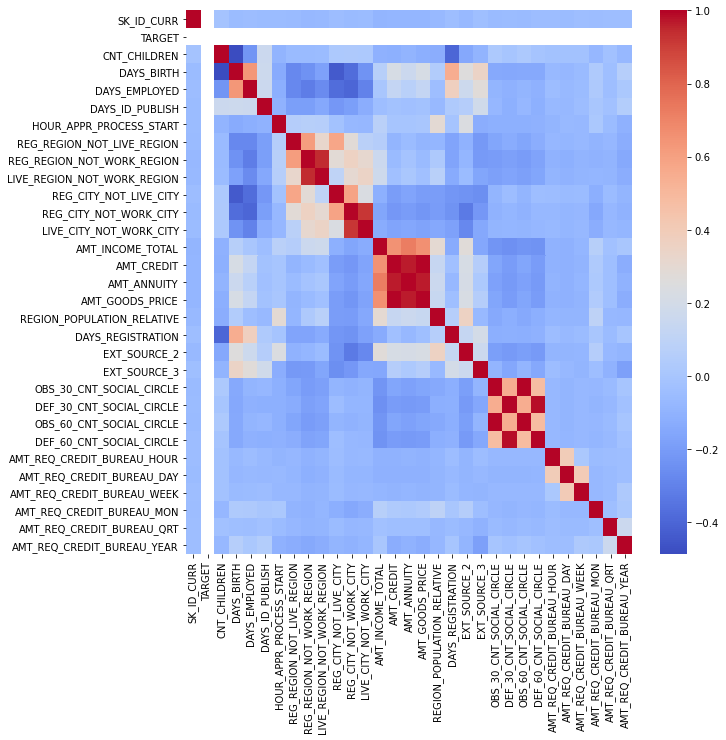

In [66]:

fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(Nondef_corr.corr(), annot = False ,cmap= 'coolwarm', ax=ax)
plt.show()

**Heatmap for Default population**

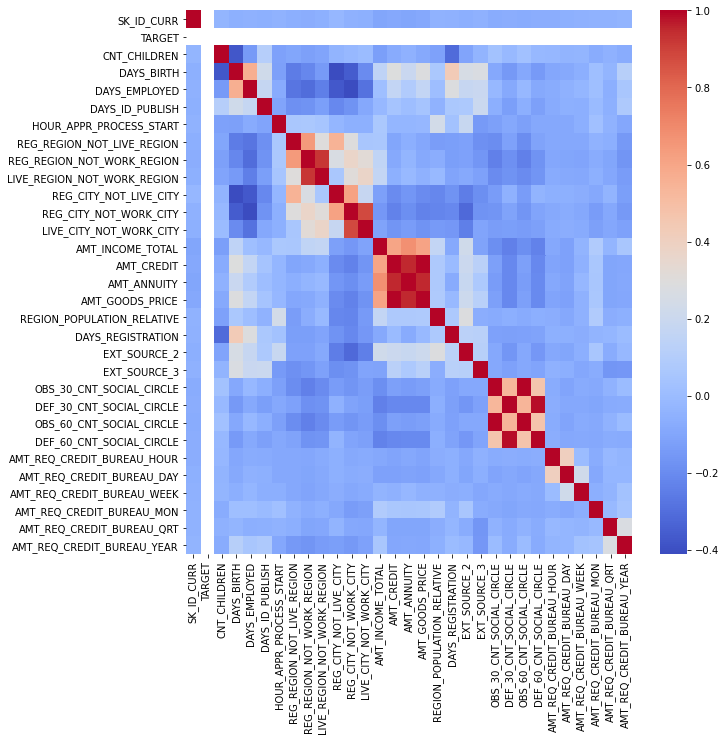

In [67]:
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(Def_corr.corr(), annot = False ,cmap= 'coolwarm')
plt.show()

In [68]:
App_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Univariate Analysis for numericals listed below:  
  1. SK_ID_CURR
  2. CNT_CHILDREN
  3. AMT_INCOME_TOTAL
  4. AMT_CREDIT
  5. AMT_ANNUITY
  6. AMT_GOODS_PRICE
  7. DAYS_EMPLOYED
  8. DAYS_REGISTRATION
  9. DAYS_ID_PUBLISH
  10. HOUR_APPR_PROCESS_START
  11. EXT_SOURCE_2
  12. EXT_SOURCE_3
  13. AMT_REQ_CREDIT_BUREAU_MON
  14. AMT_REQ_CREDIT_BUREAU_YEAR
 
**Caveat : We are spliting the presentation of the above variables in group of 4 chart per window to save the length of the file. Also we are using the most important numerical columns which we think may have divegrent trends between target 1 and target 0**

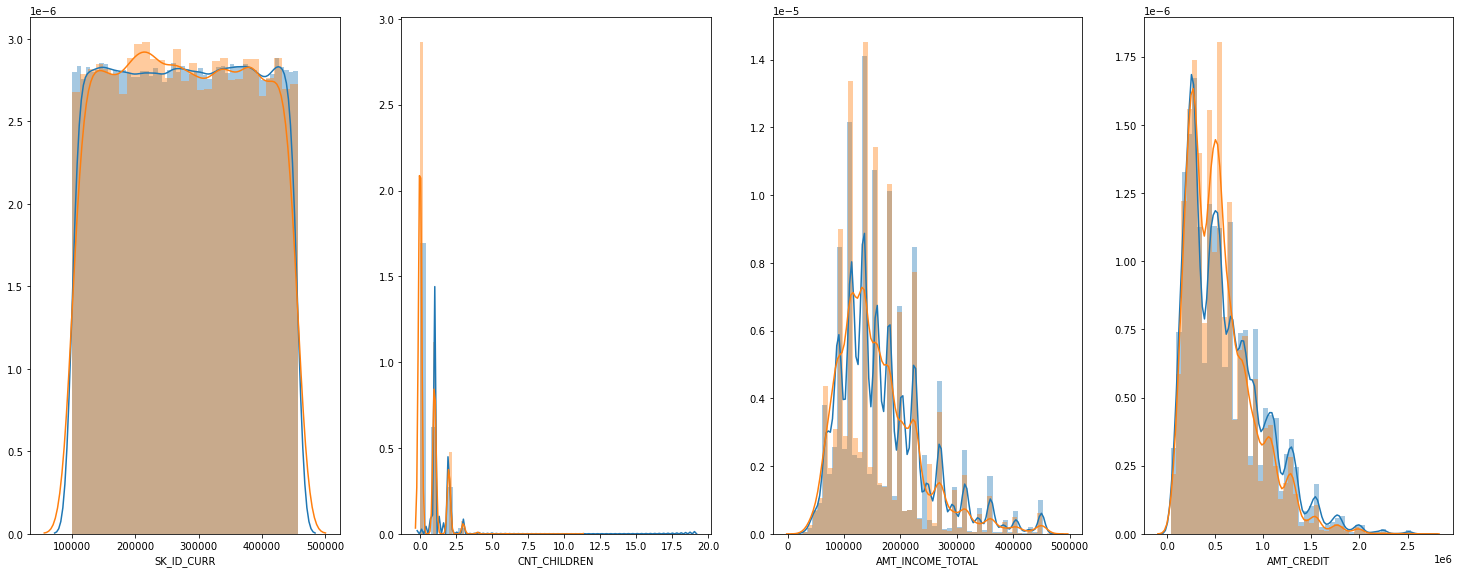

In [69]:
# First four variables
fig, axes = plt.subplots(sharex=False,sharey=False, ncols=4)
sns.distplot(Target_final0['SK_ID_CURR'].dropna(),ax=axes[0],label='0')
sns.distplot(Target_final1['SK_ID_CURR'].dropna(),ax=axes[0],label='1')
sns.distplot(Target_final0['CNT_CHILDREN'].dropna(),ax=axes[1],label='0')
sns.distplot(Target_final1['CNT_CHILDREN'].dropna(),ax=axes[1],label='1')
sns.distplot(Target_final0['AMT_INCOME_TOTAL'].dropna(),ax=axes[2],label='0')
sns.distplot(Target_final1['AMT_INCOME_TOTAL'].dropna(),ax=axes[2],label='1')
sns.distplot(Target_final0['AMT_CREDIT'].dropna(),ax=axes[3],label='0')
sns.distplot(Target_final1['AMT_CREDIT'].dropna(),ax=axes[3],label='1')
fig.set_size_inches(25.5,9.5,forward=True)
plt.show()

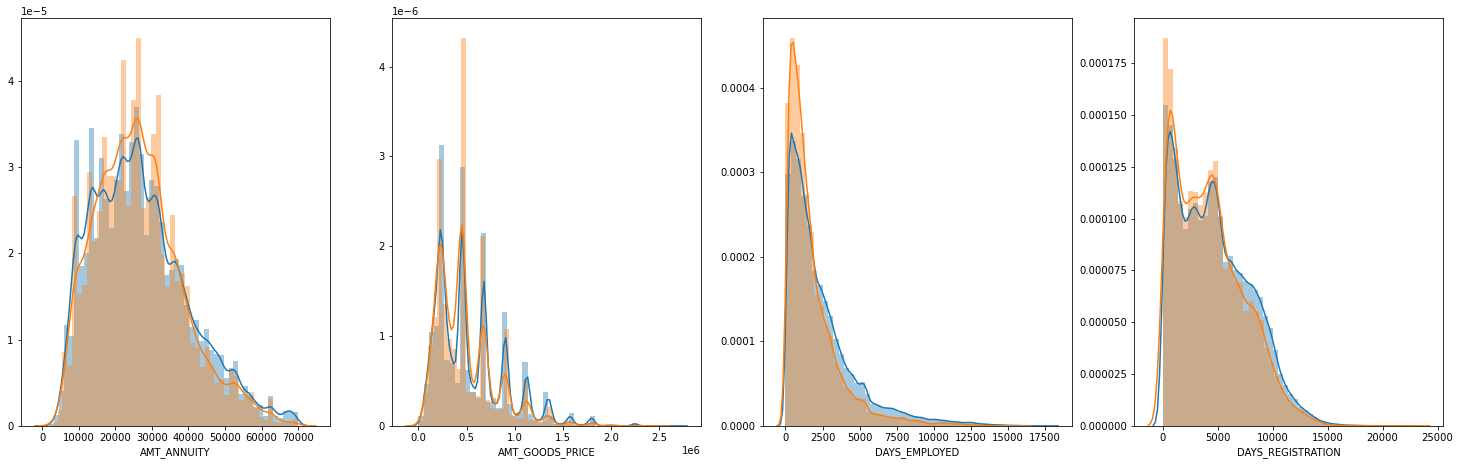

In [70]:
#next four variables i.e from 5- 8 
fig, axes = plt.subplots(sharex=False,sharey=False, ncols=4)
sns.distplot(Target_final0['AMT_ANNUITY'].dropna(),ax=axes[0])
sns.distplot(Target_final1['AMT_ANNUITY'].dropna(),ax=axes[0])
sns.distplot(Target_final0['AMT_GOODS_PRICE'].dropna(),ax=axes[1])
sns.distplot(Target_final1['AMT_GOODS_PRICE'].dropna(),ax=axes[1])
sns.distplot(Target_final0['DAYS_EMPLOYED'].dropna(),ax=axes[2],label='0')
sns.distplot(Target_final1['DAYS_EMPLOYED'].dropna(),ax=axes[2],label='1')
sns.distplot(Target_final0['DAYS_REGISTRATION'].dropna(),ax=axes[3],label='0')
sns.distplot(Target_final1['DAYS_REGISTRATION'].dropna(),ax=axes[3],label='1')
fig.set_size_inches(25.5,7.5,forward=True)
plt.show()

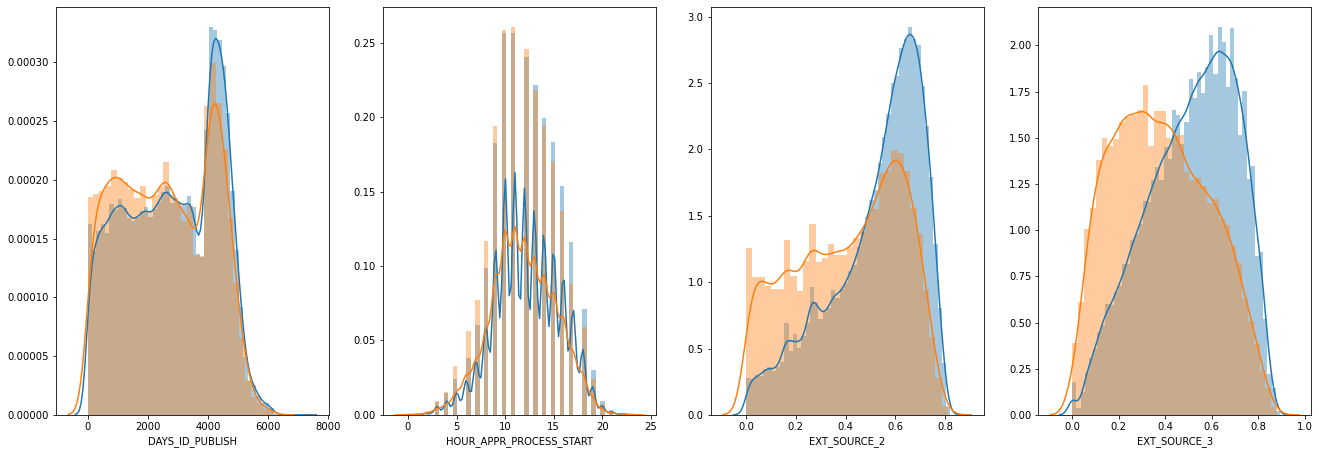

In [71]:
#next four variables i.e from 9- 12 
fig, axes = plt.subplots(sharex=False,sharey=False, ncols=4)
sns.distplot(Target_final0['DAYS_ID_PUBLISH'].dropna(),ax=axes[0])
sns.distplot(Target_final1['DAYS_ID_PUBLISH'].dropna(),ax=axes[0])
sns.distplot(Target_final0['HOUR_APPR_PROCESS_START'].dropna(),ax=axes[1],label='0')
sns.distplot(Target_final1['HOUR_APPR_PROCESS_START'].dropna(),ax=axes[1],label='1')
sns.distplot(Target_final0['EXT_SOURCE_2'].dropna(),ax=axes[2],label='0')
sns.distplot(Target_final1['EXT_SOURCE_2'].dropna(),ax=axes[2],label='1')
sns.distplot(Target_final0['EXT_SOURCE_3'].dropna(),ax=axes[3])
sns.distplot(Target_final1['EXT_SOURCE_3'].dropna(),ax=axes[3])
fig.set_size_inches(22.5,7.5,forward=True)
plt.show()


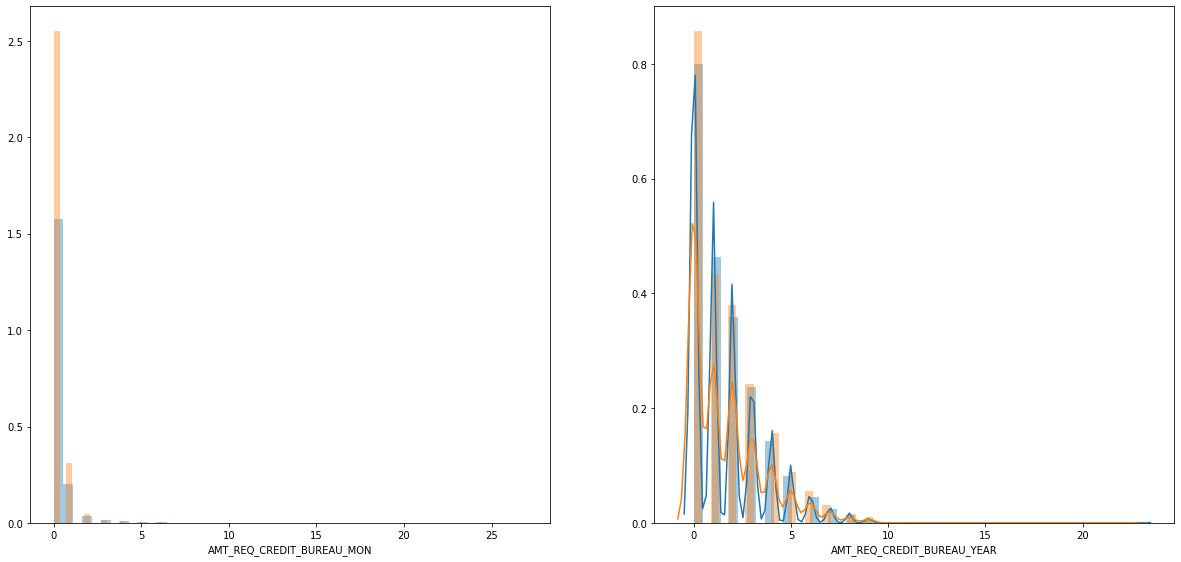

In [72]:
#last 2 variables i.e from 13- 114 
fig, axes = plt.subplots(sharex=False,sharey=False, ncols=2)
sns.distplot(Target_final0['AMT_REQ_CREDIT_BUREAU_MON'].dropna(),ax=axes[0],label='0')
sns.distplot(Target_final1['AMT_REQ_CREDIT_BUREAU_MON'].dropna(),ax=axes[0],label='1')
sns.distplot(Target_final0['AMT_REQ_CREDIT_BUREAU_YEAR'].dropna(),ax=axes[1])
sns.distplot(Target_final1['AMT_REQ_CREDIT_BUREAU_YEAR'].dropna(),ax=axes[1])
fig.set_size_inches(20.5,9.5,forward=True)
plt.show()
 

### Follwing numerical columns seems to have different distribution plot  for the target = 0 and target = 1  

1. AMT_ANNUITY

2. AMT_GOODS_PRICE

3. HOURS_APPR_PROCESS_START

4. EXT_SOUCE_2

5. AMT_CREDIT

6. EXT_SOURCE_3

7. AMT_REQ_CREDIT_BUREAU_YEAR

# Now Analysing the Previous Application Data

In [73]:
Pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [74]:
Pre_data.shape

(1670214, 26)

In [75]:
#Previous application data is huge so, we are deleting some rows so that it could be easily merged
Pre_data=Pre_data.loc[0:70000]

In [76]:
Pre_data.shape

(70001, 26)

### Merging some data for the Analysing

In [77]:
Merged =pd.merge(App_data, Pre_data, how='left', on=['SK_ID_CURR'])

In [78]:
Merged.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_

In [79]:
len(Merged.columns)

67

In [80]:
Pre_data.NAME_CONTRACT_STATUS.unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

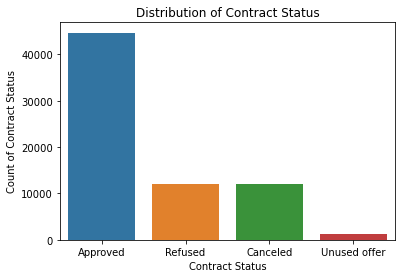

In [81]:
sns.countplot(Pre_data.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

#### Separate the merged dataset into 4 Categories- "Approved", "Refused", "Canceled" and "Unused offer".

In [82]:
approved=Merged[Merged.NAME_CONTRACT_STATUS=='Approved']
refused=Merged[Merged.NAME_CONTRACT_STATUS=='Refused']
canceled=Merged[Merged.NAME_CONTRACT_STATUS=='Canceled']
unused=Merged[Merged.NAME_CONTRACT_STATUS=='Unused Offer']

In [83]:
def plot_func(var):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,8))
    
    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    ax1.set_title("Refused", fontsize=8)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    
    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_title("Approved", fontsize=8)
    
    
    s3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index,)
    ax3.set_title("Canceled", fontsize=8)
    ax3.set_xlabel('%s' %var)
   
    s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
    plt.show()

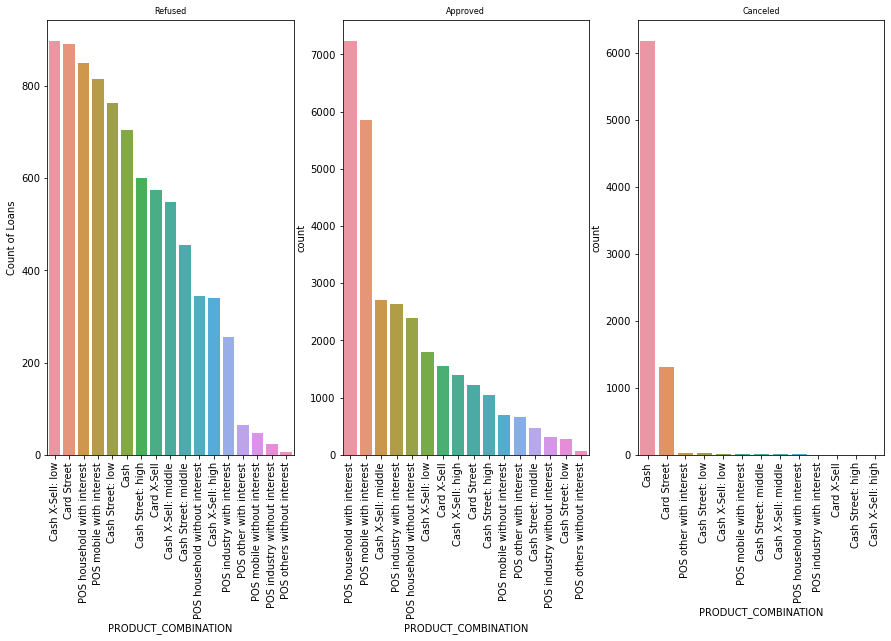

In [84]:
plot_func('PRODUCT_COMBINATION')

***We observe most number of loans were approved for POS household with interest.***

***Most number of refused loans were of Cash X-Sell***.

***Most Canceled loans were Cash loan***

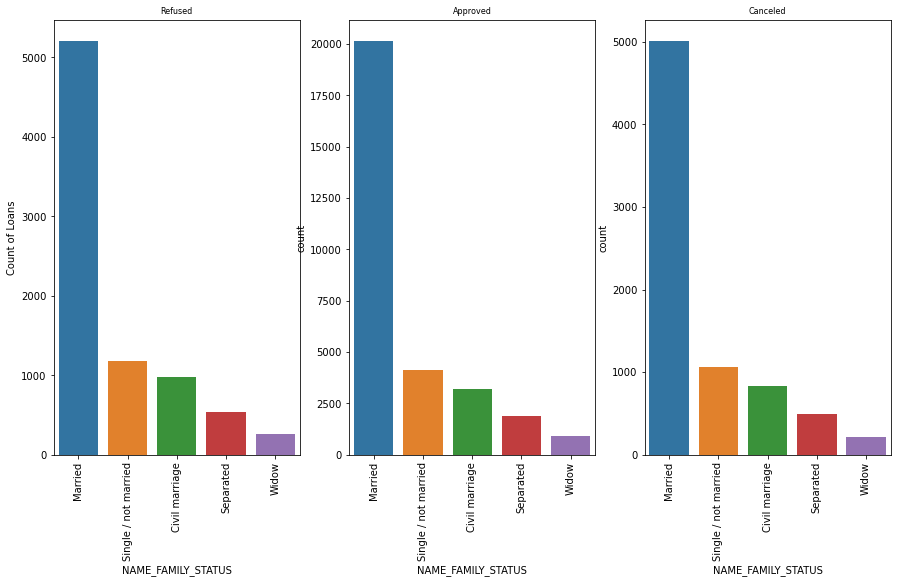

In [188]:
plot_func('NAME_FAMILY_STATUS')

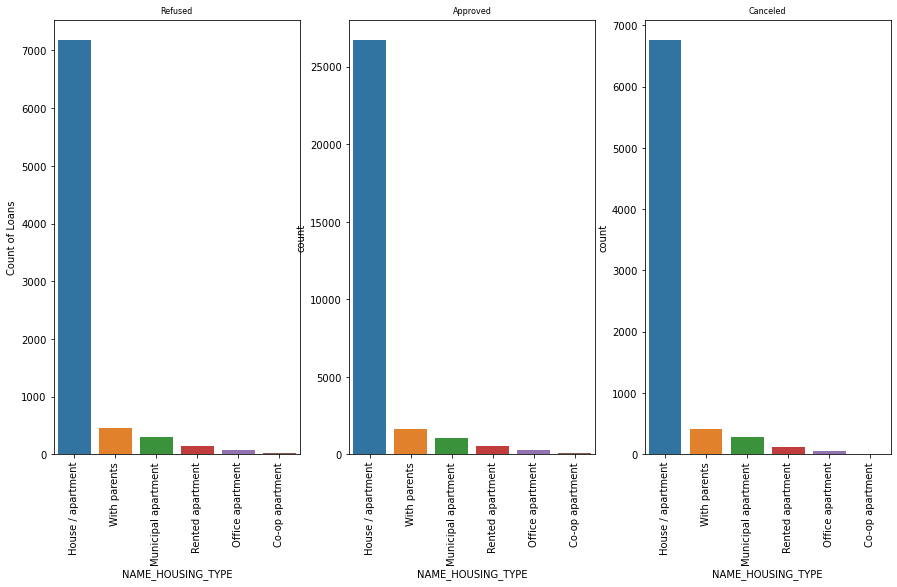

In [187]:
plot_func('NAME_HOUSING_TYPE')

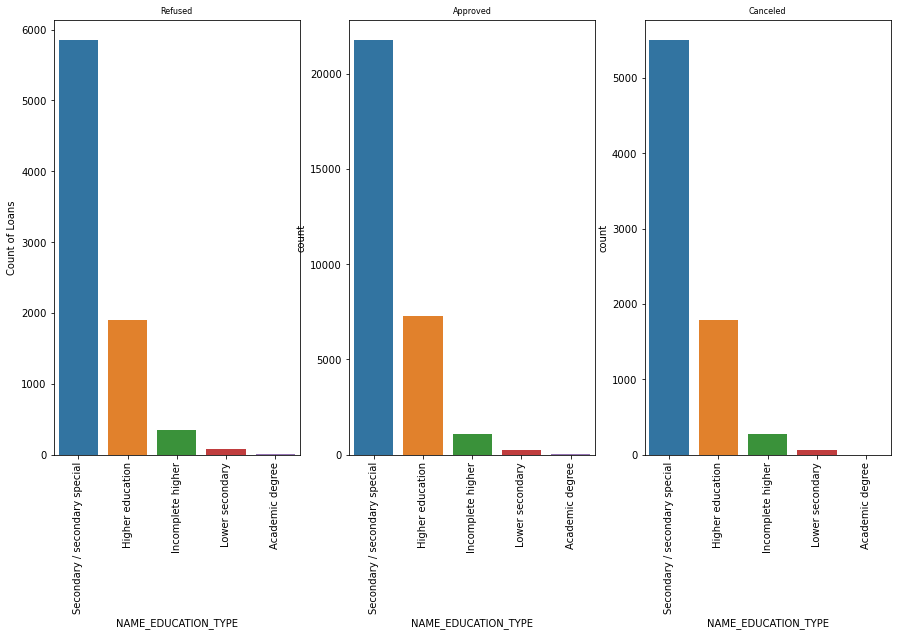

In [186]:
plot_func('NAME_EDUCATION_TYPE')

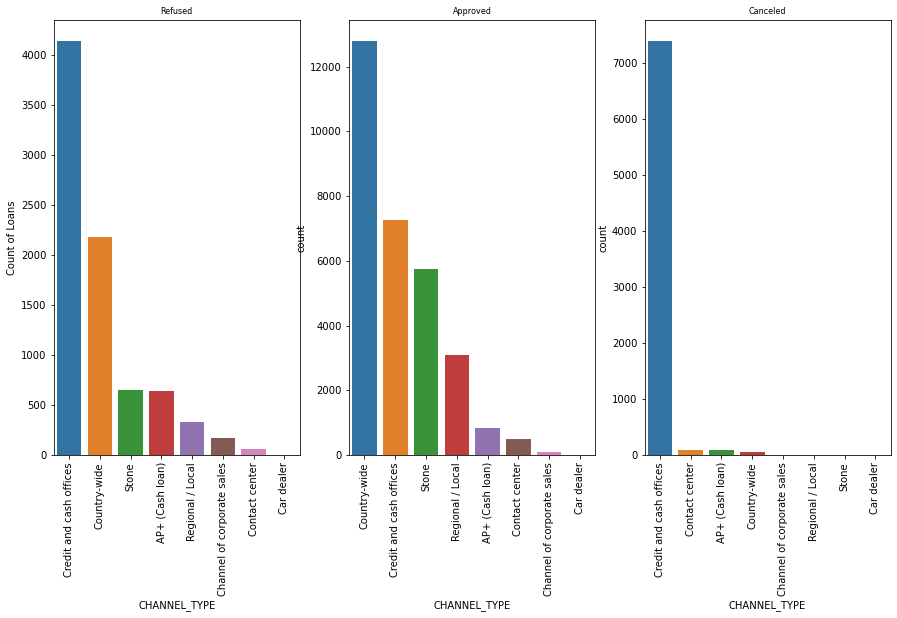

In [86]:
plot_func('CHANNEL_TYPE')

**1-Most approved loans were from Country-wide Channel.**

**2-Most refused loans were from Credit and Cash Offices Channel**

**Bivariate Analaysis** 

In [87]:
def plot_func1(var):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
    
    s1=sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=approved)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    
    s2=sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=refused)
    s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Approved", fontsize=10)
    
    
    s3=sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=cancelled)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
    plt.show()

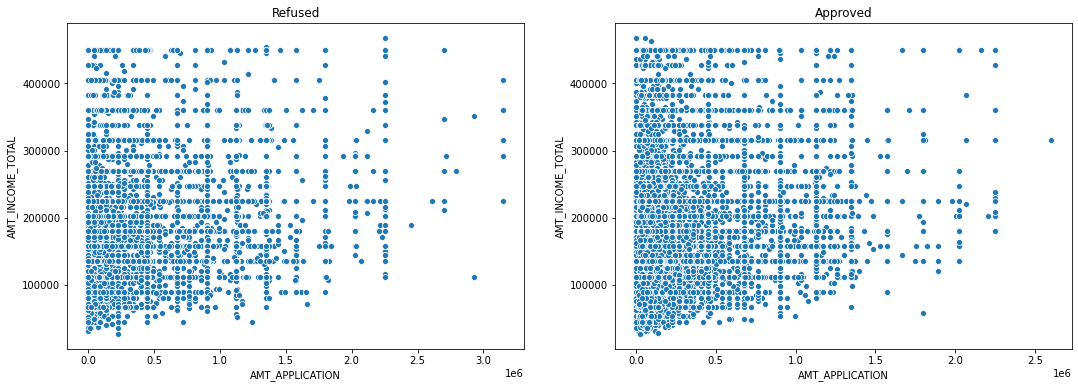

In [88]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=refused)
plt.title('Refused')

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=approved)
plt.title('Approved')
plt.show()

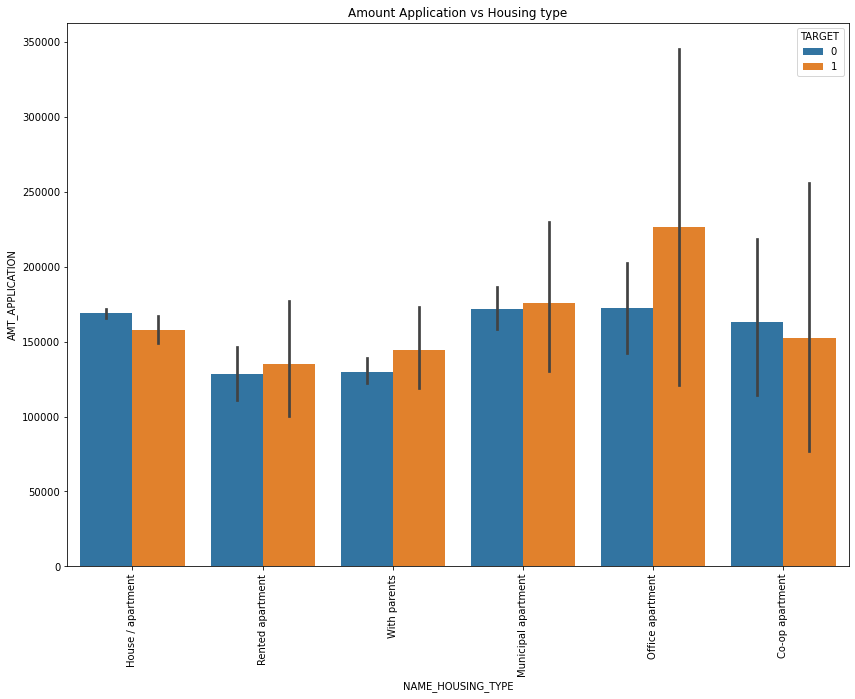

In [89]:
# Bar plotting for Credit amount application vs Housing type in logarithmic scale

plt.figure(figsize=(14,10))
plt.xticks(rotation=90)
sns.barplot(data =Merged, y='AMT_APPLICATION',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Amount Application vs Housing type')
plt.show()

**It has been observed that Credit/loan request by applicants was highest for Office Apartment followed by municipal apartment and house/apartment.**

**However, both Office aprtment and municipal apartment have reported higher defaulter(target1) proportion than non defaulter(target0).**

**So, we can conclude that bank should avoid giving loans for office and municipal apartment as they are having difficulties in payment.**

**Bank can focus mostly on disbursing loans for house/apartment , co-op apartment**


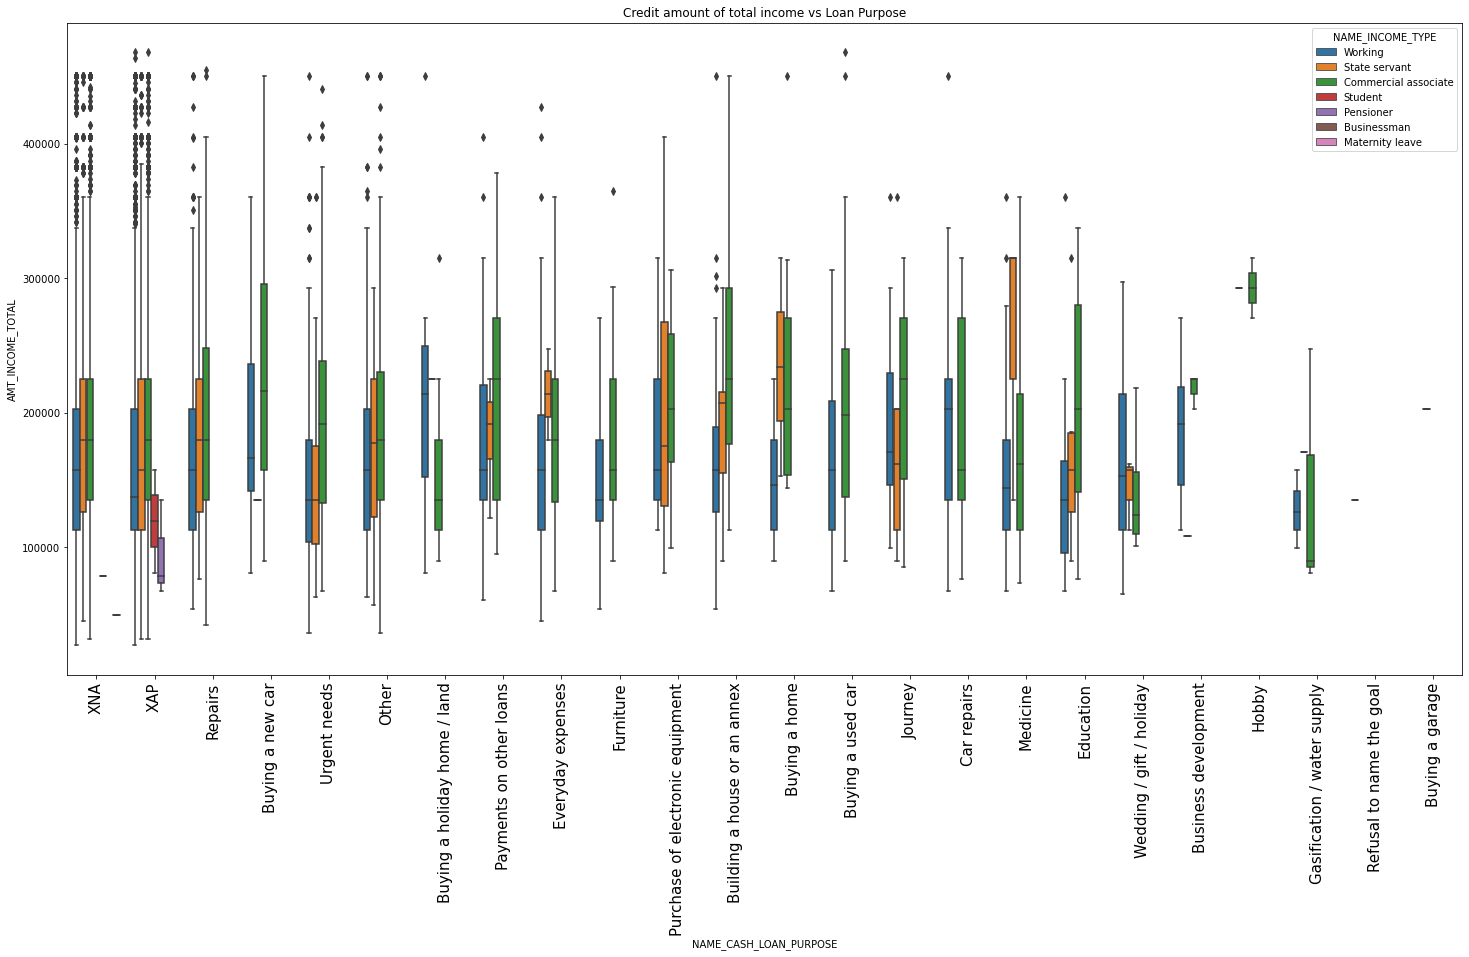

In [184]:
# Box plotting for Credit amount for total income

plt.figure(figsize=(25,12))
plt.xticks(rotation=90, fontsize= 15)
plt.yscale("linear")
sns.boxplot(data =Merged, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',orient='v')
plt.title('Credit amount of total income vs Loan Purpose')
fig.tight_layout() 
plt.show()

**The credit amount of Loan purposes like 'Buying a home’, ’Buying a land’, 'Buying a new car' and ‘Building a house' is higher**.

**Income of state servants and commericial associate who have applied for loan is significantly higher than other loan applicants**

**Loan applied for 'Hobby' & 'garage buying' is significantly low.**

